In [26]:
import pandas as pd
import os
import time

In [27]:
df = pd.read_csv('control_grn/Blood.csv', sep=',')

In [28]:
df.set_index(df.columns[0], inplace=True)
df.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.0,0.000009,0.0,0.000000,0.0,0.000034,0.000000,0.000000,...,0.00000,0.000000,0.000003,0.000000,0.000000,0.0,0.000000,0.00000,6.802906e-06,1.589678e-09
A1CF,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000002,0.000000,...,0.00000,0.000162,0.000000,0.000000,0.000000,0.0,0.000954,0.00000,0.000000e+00,0.000000e+00
A2M,0.000415,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000111,0.000000,0.000055,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000e+00,0.000000e+00
A2ML1,0.000000,0.000000,0.0,0.000000,0.0,0.000059,0.0,0.000000,0.000000,0.000000,...,0.00000,0.000003,0.000000,0.001301,0.000116,0.0,0.000000,0.00000,0.000000e+00,1.547182e-05
A4GALT,0.001556,0.000101,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000014,...,0.00012,0.000032,0.000154,0.000170,0.000035,0.0,0.000000,0.00001,2.974940e-07,0.000000e+00


In [29]:
def binary_search(arr, x):
    # set the lower and upper bounds
    left, right = 0, len(arr) - 1

    while left <= right:
        mid = (left + right) // 2  # find the midpoint
        if arr[mid] == x:  # check if the midpoint is the target value
            return mid
        elif arr[mid] < x:  # if the midpoint is less than the target, search the right half
            left = mid + 1
        else:  # if the midpoint is greater than the target, search the left half
            right = mid - 1

    return -1  # if the target is not found in the array, return -1

def network_reconstruction(grn):
    start = time.time()
    grn = grn.stack().reset_index()
    end=time.time()
    t=end-start
    print(f'{t:0.3f}')
    grn.columns=['source','target','weight']
    grn = grn[grn['weight']!=0]
    return grn

def kogene_as_seed_file(tissue, seed):
    with open(f'/home/kjh/kjh_dir/in_sil/np_example/seeds/{tissue}_{seed}.txt', 'w') as f:
        f.write(seed)
        
def pseudo_ko(WT_grn, gene_to_ko):
    ko_grn = WT_grn.copy()
    row_index = ko_grn.index.tolist()
    print(row_index[:100])
    ko_grn.loc[row_index[(binary_search(row_index, gene_to_ko))],:] = 0
    return ko_grn

In [30]:
wt_grn = network_reconstruction(df)


29.529


In [31]:
import torch
from torch_geometric.data import Data

ModuleNotFoundError: No module named 'torch'

In [ ]:
data = Data()

edge_index = torch.tensor(wt_grn[['source', 'target']].values).t().contiguous()
edge_attr = torch.tensor(wt_grn['weight'].values).view(-1, 1)
data.edge_index = edge_index
data.edge_attr = edge_attr

In [6]:
wt_grn['weight'].sort_values()

19238848    -8.380155e-07
204015598   -7.958398e-07
287824854   -7.771975e-07
217483500   -7.771975e-07
198751714   -7.756297e-07
                 ...     
270353595    1.018603e-02
119648964    1.048008e-02
285602726    1.088160e-02
144393725    1.128964e-02
16709790     1.274993e-02
Name: weight, Length: 97482387, dtype: float64

In [8]:
wt_grn[wt_grn['weight'] < 0].sort_values('weight')

,source,target,weight
19238848,ATF4,DKK2,-8.380155e-07
204015598,PGAP3,DKK2,-7.958398e-07
287824854,TMEM70,GDF9,-7.771975e-07
217483500,PRLHR,GDF9,-7.771975e-07
198751714,PARP1,DKK2,-7.756297e-07
...,...,...,...
171447964,MTAP,PDF,-4.572572e-13
167547462,MOCS3,EIF4A3,-2.306456e-13
237011980,RPL7,PAQR7,-1.449931e-13
208609350,PLCG2,ARID3B,-4.785836e-15


In [9]:
wt_grn[wt_grn['weight'] > 0].sort_values('weight')

,source,target,weight
286317507,TMEM19,RBP1,4.452980e-17
111317527,GPS1,APRT,6.560748e-17
109005917,GPBAR1,SOD2,1.001062e-16
159849527,MED16,DNAJB2,1.041979e-16
272123445,STRAP,GLB1L,2.004448e-16
...,...,...,...
270353595,ST6GALNAC5,CDK5RAP3,1.018603e-02
119648964,HIVEP3,DCAF13,1.048008e-02
285602726,TMEM154,ARPC5L,1.088160e-02
144393725,LAMP1,TCN2,1.128964e-02


In [19]:
import numpy as np
import matplotlib.pyplot as plt

0.00014664888678453993


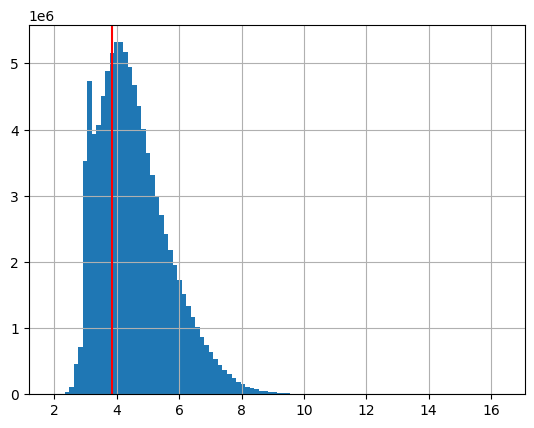

In [23]:
threshold = wt_grn[wt_grn['weight'] > 0]['weight'].quantile(0.7)
print(threshold)
(-np.log10(wt_grn[wt_grn['weight'] > 0]['weight'])).hist(bins=100)
plt.axvline(-np.log10(threshold), color='red')
plt.show()

<Axes: >

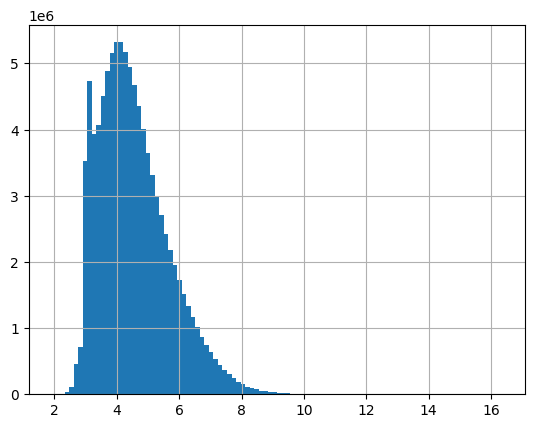

In [17]:

(-np.log10(wt_grn[wt_grn['weight'] > 0]['weight'])).hist(bins=100)

In [25]:
ko_grn = pseudo_ko(df, 'A2M')
ko_grn

['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AADAC', 'AADACL2', 'AADACL3', 'AADACL4', 'AADAT', 'AAGAB', 'AAK1', 'AAMP', 'AANAT', 'AARS', 'AARS2', 'AASDH', 'AASDHPPT', 'AASS', 'AATF', 'AATK', 'ABAT', 'ABCA1', 'ABCA10', 'ABCA11P', 'ABCA12', 'ABCA13', 'ABCA2', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCA9', 'ABCB1', 'ABCB10', 'ABCB11', 'ABCB4', 'ABCB5', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC1', 'ABCC10', 'ABCC11', 'ABCC12', 'ABCC13', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC6', 'ABCC8', 'ABCC9', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABCG2', 'ABCG4', 'ABCG5', 'ABCG8', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD12B', 'ABHD13', 'ABHD14A', 'ABHD14B', 'ABHD15', 'ABHD2', 'ABHD3', 'ABHD4', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI2', 'ABI3', 'ABI3BP', 'ABL1', 'ABL2', 'ABLIM1', 'ABLIM2', 'ABLIM3', 'ABO', 'ABR', 'ABRA', 'ABT1']


,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000034,0.000000,0.000000,...,0.000000,0.000000,2.556420e-06,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.802906e-06,1.589678e-09
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,...,0.000000,0.000162,0.000000e+00,0.000000,0.000000,0.000000,9.540899e-04,0.000000e+00,0.000000e+00,0.000000e+00
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A2ML1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000059,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000003,0.000000e+00,0.001301,0.000116,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.547182e-05
A4GALT,0.001556,0.000101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,...,0.000120,0.000032,1.542434e-04,0.000170,0.000035,0.000000,0.000000e+00,9.686493e-06,2.974940e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000160,0.000000,0.000000e+00,0.000002,0.000002,0.000000,2.635936e-08,0.000000e+00,0.000000e+00,0.000000e+00
ZYG11B,0.000000,0.000000,0.000035,0.000000,0.000008,0.000015,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.636387e-05
ZYX,0.000000,0.000000,0.000305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000,...,0.000003,0.000000,2.498273e-06,0.000281,0.000423,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [20]:
wt_grn = network_reconstruction(df)

28.358


In [21]:
ko_grn = network_reconstruction(ko_grn)

28.263


In [31]:
tissue = 'Blood'
seed = 'A2M'

wt_grn.to_csv(f'/home/kjh/kjh_dir/in_sil/np_example/input_graphs/{tissue}_{seed}_WT.tsv', sep='\t', header = False, index=False)
ko_grn.to_csv(f'/home/kjh/kjh_dir/in_sil/np_example/input_graphs/{tissue}_{seed}_KO.tsv', sep='\t', header = False, index=False)

In [28]:
kogene_as_seed_file(tissue, seed)